Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Modeling Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Preparing X and Y Variable

In [5]:
X = df.drop('math score', axis=1)
y = df['math score']

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
# Create column Transformer to transform the data
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [10]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [11]:
X = preprocessor.fit_transform(X)

In [16]:
X = pd.DataFrame(X)
print(X)
print(X.shape)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3    0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
4    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
996  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
997  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
998  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
999  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   

      14   15   16        17        18  
0    1.0  0.0  1.0  0.193999  0.39

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

DecisionTree
model performance on training set:
MAE: 0.01875, MSE: 0.078125, RMSE: 0.2795084971874737, R2: 0.9996534669718089
model performance on testing set:
MAE: 6.46, MSE: 65.43, RMSE: 8.088881257627659, R2: 0.7311151877385567
-----------------------------------
KNeighbors
model performance on training set:
MAE: 4.5175, MSE: 32.5957, RMSE: 5.709264400953944, R2: 0.8554177711742752
model performance on testing set:
MAE: 5.6370000000000005, MSE: 52.6834, RMSE: 7.258333141982393, R2: 0.7834973847119895
-----------------------------------
RandomForest
model performance on training set:
MAE: 1.8270687500000002, MSE: 5.264308131342122, RMSE: 2.2944080132666294, R2: 0.9766495150325095
model performance on testing set:
MAE: 4.646040476190476, MSE: 36.310563316751704, RMSE: 6.025824700134556, R2: 0.850781613930429
-----------------------------------
AdaBoost
model performance on training set:
MAE: 4.7374870644910905, MSE: 33.56144771648036, RMSE: 5.793224293645151, R2: 0.8511340786218193
mo

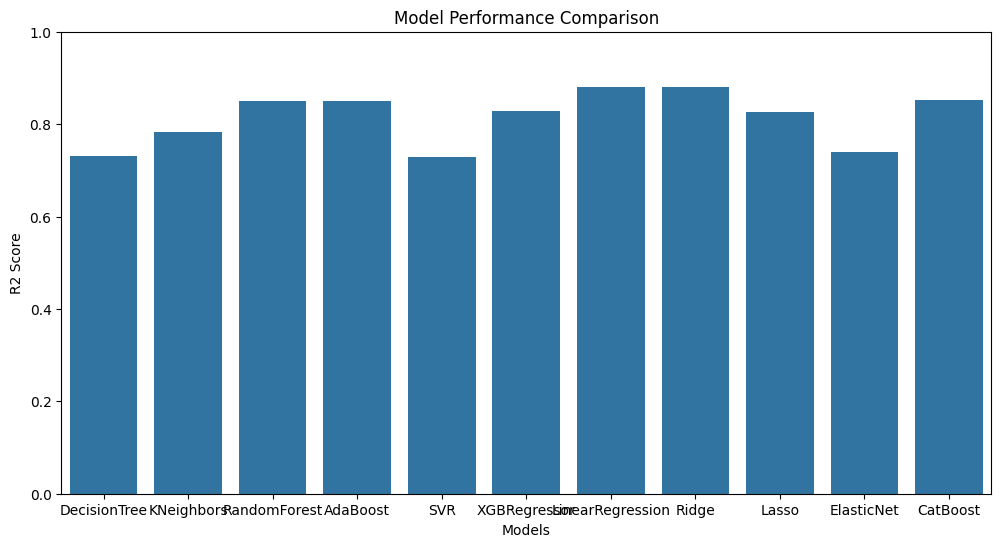

In [20]:
models = {
    "DecisionTree": DecisionTreeRegressor(),    
    "KNeighbors": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "CatBoost": CatBoostRegressor(verbose=False)
}

model_lists = []
r2_lists = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate the model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_lists.append(list(models.keys())[i])
    print('model performance on training set:')
    print(f'MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, R2: {train_r2}')
    print('model performance on testing set:')
    print(f'MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, R2: {test_r2}')
    r2_lists.append(test_r2)
    print('-----------------------------------')
# Visualize the model performance
plt.figure(figsize=(12,6))
sns.barplot(x=model_lists, y=r2_lists)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()      


In [21]:
pd.DataFrame({'Model': model_lists, 'R2 Score': r2_lists}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
7,Ridge,0.880593
6,LinearRegression,0.880433
10,CatBoost,0.851632
2,RandomForest,0.850782
3,AdaBoost,0.850658
5,XGBRegressor,0.827797
8,Lasso,0.825320
1,KNeighbors,0.783497
9,ElasticNet,0.739624
0,DecisionTree,0.731115
